In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


In [16]:
A = np.array([                      
    [1.6, 1.3, 1.0, 0.8, 0.5],
    [1.9, 1.6, 1.3, 1.0, 0.8],
    [2.1, 1.9, 1.6, 1.3, 1.0],
    [2.3, 2.1, 1.9, 1.6, 1.3],
    [2.5, 2.3, 2.1, 1.8, 1.5]
])


Cost = [15.91,37.1,63.47,110.47,209.89]

Runs = 500




In [4]:
def Get_Profit(A, Population, Cost, i):
    term = 2 * np.sum(A[i, :] * Population) - 2 * A[i, i] * Population[i]  # Summation term
    return(-(1059.558838 + Cost[i])
            + 51.712382 * term
            - 0.953450 * (term)**2
            + 0.009183 * (term)**3
            - 0.000034 * (term)**4)

def Get_Fitness(A, Population, Cost):
    Fitness = np.zeros(5) #fitness function

    for i in range(5):
        profit = Get_Profit(A, Population, Cost, i)
        Fitness[i] = np.exp(0.04 * profit)
        
    return(Fitness)

In [5]:
def Get_Mutation_Matrix(Population, Fitness, Generation):
    Mut_matrix = [                      
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0.001, 0, 0, 0, 0],
    [0.001, 0.01, 0.05, 0, 0]]
    for a in range(4):
        for b in range(5):
            if Fitness[a] >= Fitness[b]:
                Mut_matrix[a][b] = 0
            else:
                (Mut_matrix[a])[b] = (Mut_matrix[a])[b] * 0.005 * (Fitness[a]/Fitness[b])**2
    return(Mut_matrix)





In [14]:
def Moran_Process(Population, Runs, A):
    Population = list(Population)
    Pop_Over_Time0 = list(0 for x in range(Runs))
    Pop_Over_Time1 = list(0 for x in range(Runs))
    Pop_Over_Time2 = list(0 for x in range(Runs))
    Pop_Over_Time3 = list(0 for x in range(Runs))
    Pop_Over_Time4 = list(0 for x in range(Runs))
    Selection_Values_Duplication = np.zeros(5)
    Selection_Values_Removal = np.zeros(5)
    Profit_Over_Time1 = list(0 for x in range(Runs))
    Profit_Over_Time2 = list(0 for x in range(Runs))
    Profit_Over_Time3 = list(0 for x in range(Runs))
    Profit_Over_Time4 = list(0 for x in range(Runs))
    Profit_Over_Time5 = list(0 for x in range(Runs))
    for Generations in range(Runs):
        Fitness = Get_Fitness(A, Population, Cost)
        Profit_Over_Time1[Generations] = Get_Profit(A, Population, Cost, 0)
        Profit_Over_Time2[Generations] = Get_Profit(A, Population, Cost, 1)
        Profit_Over_Time3[Generations] = Get_Profit(A, Population, Cost, 2)
        Profit_Over_Time4[Generations] = Get_Profit(A, Population, Cost, 3)
        Profit_Over_Time5[Generations] = Get_Profit(A, Population, Cost, 4)
        for i in range(5):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(5):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([0,1,2,3,4], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([0,1,2,3,4], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1
        mutat = Get_Mutation_Matrix(Population, Fitness, Generations)
        for l in range(5):
            if Population[l] > 0:
                for m in range(5):
                    Moran_Mutation_Value = random.choice([0,1], p=(1-mutat[l][m], mutat[l][m]), size=(1))[0]
                    if Moran_Mutation_Value == 1:
                        #Population[int(m)] = Population[int(m)] + 1
                        #Population[int(l)] = Population[int(l)] - 1
                        break
        Pop_Over_Time0[Generations] = Population[0]
        Pop_Over_Time1[Generations] = Population[1]
        Pop_Over_Time2[Generations] = Population[2]
        Pop_Over_Time3[Generations] = Population[3]
        Pop_Over_Time4[Generations] = Population[4]
    Return_Vec = [Population, Pop_Over_Time0, Pop_Over_Time1,Pop_Over_Time2,Pop_Over_Time3, Pop_Over_Time4, Profit_Over_Time3, Profit_Over_Time4, Profit_Over_Time5, Profit_Over_Time1, Profit_Over_Time2]
    return(Return_Vec)





In [8]:
def most_frequent(List):
    print(List[1],List[2])
    return max(set(List), key=List.count)


def Make_List(p1, p2, p3, p4, p5):
    Result = []
    for x in range(len(p1)):
        b = [p1[x], p2[x], p3[x], p4[x], p5[x]]
        Result.append(b)
    return(Result)


In [9]:
def Get_Average(A, B, C, D, E):
    result = []
    print(len(A))
    for i in range(len(A)):
        result.append((A[i]+B[i]+C[i]+D[i]+E[i])/5)
    return(result)

In [12]:
def Show_Generations(Pop_Over_Time0, Pop_Over_Time1, Pop_Over_Time2, Pop_Over_Time3, Pop_Over_Time4, Runs):
    K = Runs - 1
    x = [i for i in range(K)]
    y0 = [Pop_Over_Time0[i] for i in range(K)]
    y1 = [Pop_Over_Time1[i] for i in range(K)]
    y2 = [Pop_Over_Time2[i] for i in range(K)]
    y3 = [Pop_Over_Time3[i] for i in range(K)]
    y4 = [Pop_Over_Time4[i] for i in range(K)]
    plt.scatter(x, y0, color = 'purple', label = 'Low Spend')
    plt.scatter(x, y1, color = 'blue', label = 'Mid-Low Spend')
    plt.scatter(x, y2, color = 'green', label = 'Mid Spend')
    plt.scatter(x, y3, color = 'orange', label = 'Mid-High Spend')
    plt.scatter(x, y4, color = 'red', label = 'High Spend')
    plt.xlabel("Generations")
    plt.ylabel("Population")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show

def Show_Profit(Profit1, Profit2, Profit3, Profit4, Profit5, K):
    x = [i for i in range(K)]
    y0 = [Profit1[i] for i in range(K)]
    y1 = [Profit2[i] for i in range(K)]
    y2 = [Profit3[i] for i in range(K)]
    y3 = [Profit4[i] for i in range(K)]
    y4 = [Profit5[i] for i in range(K)]
    plt.plot(x, y3, color = 'purple', label = 'Low Spend')
    plt.show
    plt.plot(x, y0, color = 'green', label = 'Mid Spend')
    plt.plot(x, y1, color = 'orange', label = 'Mid-High Spend')
    plt.plot(x, y2, color = 'red', label = 'High Spend')
    plt.plot(x, y4, color = 'blue', label = 'Mid-Low Spend')
    plt.show
    plt.xlabel("Generations")
    plt.ylabel("Profit during season")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    

[[0, 0.0, 5.044738591867306e-05, 1.318319726706887e-06, 3.244252212583072e-08], [0, 0, 0.0007162128147746462, 1.8716479854076797e-05, 4.6059373874374075e-07], [0, 0, 0, 0.00013066283839088992, 3.215480994211649e-06], [0, 0, 0, 0, 0.0], [0.001, 0.01, 0.05, 0, 0]]
[[0, 0.0, 0.0007341843331860456, 0.0029000957203765016, 0.00041180090597026694], [0, 0, 0, 0, 0], [0, 0.0, 0, 0, 0.0028044789799805954], [0, 0.0, 0.0, 0, 0.0], [0.001, 0.01, 0.05, 0, 0]]
[[0, 0.0, 0.0007341843331860456, 0.0029000957203765016, 0.00041180090597026694], [0, 0, 0, 0, 0], [0, 0.0, 0, 0, 0.0028044789799805954], [0, 0.0, 0.0, 0, 0.0], [0.001, 0.01, 0.05, 0, 0]]


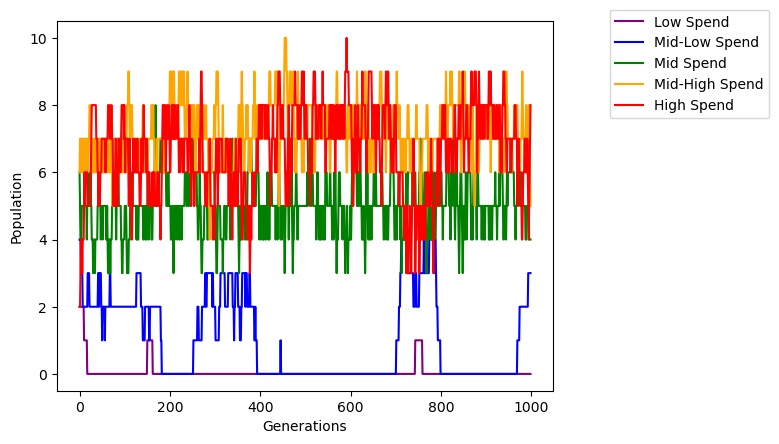

In [455]:
V = Moran_Process((2,4,6,6,2), Runs, A)


Show_Generations(V[1], V[2], V[3], V[4], V[5], Runs)



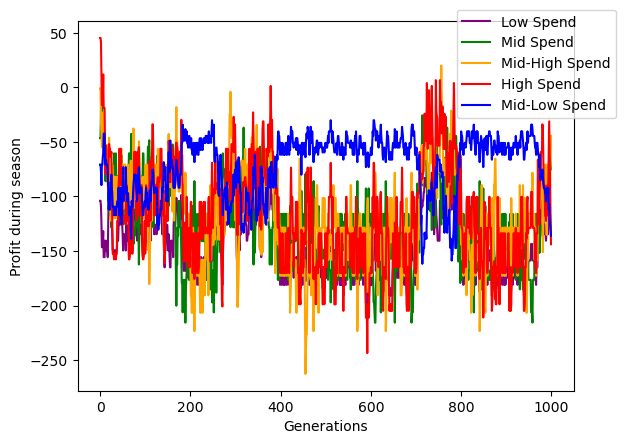

In [457]:
Show_Profit(V[6], V[7], V[8], V[9], V[10], Runs)


5
5
5
5
5
([0.0, 0.0, 5.0, 7.4, 7.6], [0.0, 0.0, 5.0, 7.4, 7.6], [0.0, 0.0, 5.0, 7.4, 7.6], [0.0, 0.0, 5.0, 7.4, 7.6], [0.0, 0.0, 5.0, 7.4, 7.6], 500)


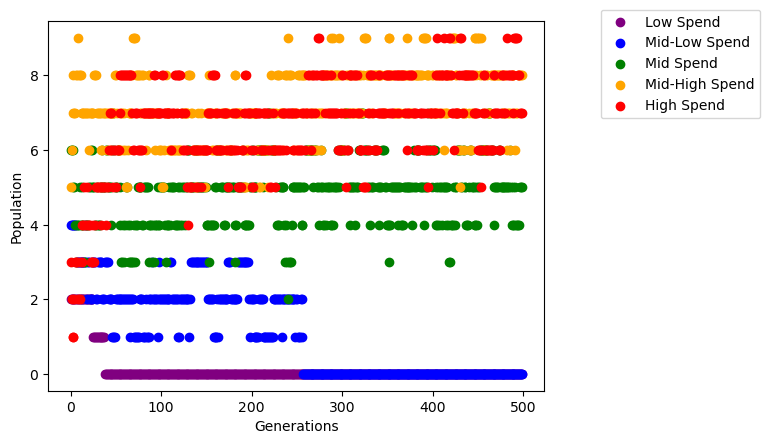

In [17]:
B = Moran_Process((2,4,6,6,2), Runs, A)
C = Moran_Process((2,4,6,6,2), Runs, A)
D = Moran_Process((2,4,6,6,2), Runs, A)
E = Moran_Process((2,4,6,6,2), Runs, A)
F = Moran_Process((2,4,6,6,2), Runs, A)


V = (Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Get_Average(B[0],C[0],D[0],E[0],F[0]), Runs)
print(V)
Show_Generations(B[1], B[2], B[3], B[4], B[5], Runs)